In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

In [105]:
# 显示所有列
pd.set_option('display.max_columns', None)

In [106]:
sales_df = pd.read_excel(r'C:\Users\wdl\Data-analysis\data\2020年销售数据.xlsx', sheet_name='Data', header=1)
sales_df

,销售日期,销售区域,销售渠道,销售订单,品牌,售价,销售数量
0,2020-01-01,上海,拼多多,182894-455,八匹马,99,83
1,2020-01-01,上海,抖音,205635-402,八匹马,219,29
2,2020-01-01,上海,天猫,205654-021,八匹马,169,85
3,2020-01-01,上海,天猫,205654-519,八匹马,169,14
4,2020-01-01,上海,天猫,377781-010,皮皮虾,249,61
...,...,...,...,...,...,...,...
1940,2020-12-30,北京,京东,D89677,花花姑娘,269,26
1941,2020-12-30,福建,实体,182719-050,八匹马,79,97
1942,2020-12-31,福建,实体,G70083,花花姑娘,269,55
1943,2020-12-31,福建,抖音,211471-902/704,八匹马,59,59


In [107]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   销售日期    1945 non-null   datetime64[ns]
 1   销售区域    1945 non-null   object        
 2   销售渠道    1945 non-null   object        
 3   销售订单    1945 non-null   object        
 4   品牌      1945 non-null   object        
 5   售价      1945 non-null   int64         
 6   销售数量    1945 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 106.5+ KB


In [108]:
sales_df['销售额'] = sales_df.售价 * sales_df.销售数量
sales_df

,销售日期,销售区域,销售渠道,销售订单,品牌,售价,销售数量,销售额
0,2020-01-01,上海,拼多多,182894-455,八匹马,99,83,8217
1,2020-01-01,上海,抖音,205635-402,八匹马,219,29,6351
2,2020-01-01,上海,天猫,205654-021,八匹马,169,85,14365
3,2020-01-01,上海,天猫,205654-519,八匹马,169,14,2366
4,2020-01-01,上海,天猫,377781-010,皮皮虾,249,61,15189
...,...,...,...,...,...,...,...,...
1940,2020-12-30,北京,京东,D89677,花花姑娘,269,26,6994
1941,2020-12-30,福建,实体,182719-050,八匹马,79,97,7663
1942,2020-12-31,福建,实体,G70083,花花姑娘,269,55,14795
1943,2020-12-31,福建,抖音,211471-902/704,八匹马,59,59,3481


In [109]:
sales_df['月份'] = sales_df.销售日期.dt.month
sales_df

,销售日期,销售区域,销售渠道,销售订单,品牌,售价,销售数量,销售额,月份
0,2020-01-01,上海,拼多多,182894-455,八匹马,99,83,8217,1
1,2020-01-01,上海,抖音,205635-402,八匹马,219,29,6351,1
2,2020-01-01,上海,天猫,205654-021,八匹马,169,85,14365,1
3,2020-01-01,上海,天猫,205654-519,八匹马,169,14,2366,1
4,2020-01-01,上海,天猫,377781-010,皮皮虾,249,61,15189,1
...,...,...,...,...,...,...,...,...,...
1940,2020-12-30,北京,京东,D89677,花花姑娘,269,26,6994,12
1941,2020-12-30,福建,实体,182719-050,八匹马,79,97,7663,12
1942,2020-12-31,福建,实体,G70083,花花姑娘,269,55,14795,12
1943,2020-12-31,福建,抖音,211471-902/704,八匹马,59,59,3481,12


In [110]:
sales_df.groupby('月份')[['销售额']].agg(['sum', 'max', 'min', 'count']) # 月份分组, 销售额列求和, 最大值, 最小值, 计数

销售额                    
        sum     max   min count
月份                             
1   5409855  115104  1035   235
2   4608455  133411  1668   219
3   4164972   93906   990   204
4   3996770  114312  1089   187
5   3239005   85914  1185   170
6   2817936  116303   690   147
7   3501304   83930   944   163
8   2948189  106711  1896   129
9   2632960  120807   948   124
10  2375385   87527  1089   133
11  2385283   68324  1185   133
12  1691973   94905   897   101

In [111]:
temp_df = sales_df.groupby(['销售区域', '月份'])[['销售额']].sum() # 二级分组
temp_df

销售额
销售区域 月份         
上海   1   1679125
     2   1689527
     3   1061193
     4   1082187
     5    841199
     6    785404
     7    863906
     8    734937
     9   1107693
     10   412108
     11   825169
     12   528041
北京   1   1878234
     2   1807787
     3   1360666
     4   1205989
     5    807300
     6   1216432
     7   1219083
     8    645727
     9    390077
     10   671608
     11   678668
     12   596146
南京   7    841032
     10   710962
     12   215307
安徽   4    341308
     5    554155
广东   3    388180
     8    469390
     9    365191
     11   395188
江苏   4    537079
浙江   3    248354
     8    439508
福建   1   1852496
     2   1111141
     3   1106579
     4    830207
     5   1036351
     6    816100
     7    577283
     8    658627
     9    769999
     10   580707
     11   486258
     12   352479

In [112]:
temp_df.index # 查看索引

MultiIndex([('上海',  1),
            ('上海',  2),
            ('上海',  3),
            ('上海',  4),
            ('上海',  5),
            ('上海',  6),
            ('上海',  7),
            ('上海',  8),
            ('上海',  9),
            ('上海', 10),
            ('上海', 11),
            ('上海', 12),
            ('北京',  1),
            ('北京',  2),
            ('北京',  3),
            ('北京',  4),
            ('北京',  5),
            ('北京',  6),
            ('北京',  7),
            ('北京',  8),
            ('北京',  9),
            ('北京', 10),
            ('北京', 11),
            ('北京', 12),
            ('南京',  7),
            ('南京', 10),
            ('南京', 12),
            ('安徽',  4),
            ('安徽',  5),
            ('广东',  3),
            ('广东',  8),
            ('广东',  9),
            ('广东', 11),
            ('江苏',  4),
            ('浙江',  3),
            ('浙江',  8),
            ('福建',  1),
            ('福建',  2),
            ('福建',  3),
            ('福建',  4),
            ('福建',  5),
            ('福建

In [113]:
temp_df1 = temp_df.unstack().fillna(0).applymap(int) # 二级索引转换为列索引, 并填充空值为0, 并将数据类型转换为int
temp_df1

销售额                                                                \
月份         1        2        3        4        5        6        7       8    
销售区域                                                                          
上海    1679125  1689527  1061193  1082187   841199   785404   863906  734937   
北京    1878234  1807787  1360666  1205989   807300  1216432  1219083  645727   
南京          0        0        0        0        0        0   841032       0   
安徽          0        0        0   341308   554155        0        0       0   
广东          0        0   388180        0        0        0        0  469390   
江苏          0        0        0   537079        0        0        0       0   
浙江          0        0   248354        0        0        0        0  439508   
福建    1852496  1111141  1106579   830207  1036351   816100   577283  658627   

                                       
月份         9       10      11      12  
销售区域                                   
上海    1107693  412108  825169  528041  
北京     390077  671608  678668  596146  
南京          0  710962       0  215307  
安徽          0       0       0       0  
广东     365191       0  395188       0  
江苏          0       0       0       0  
浙江          0       0       0       0  
福建     769999  580707  486258  352479

In [114]:
temp_df2 = temp_df.unstack(level=0).fillna(0).applymap(int) # 二级索引转换为列索引, 并填充空值为0, 并将数据类型转换为int
temp_df2

销售额                                                          
销售区域       上海       北京      南京      安徽      广东      江苏      浙江       福建
月份                                                                     
1     1679125  1878234       0       0       0       0       0  1852496
2     1689527  1807787       0       0       0       0       0  1111141
3     1061193  1360666       0       0  388180       0  248354  1106579
4     1082187  1205989       0  341308       0  537079       0   830207
5      841199   807300       0  554155       0       0       0  1036351
6      785404  1216432       0       0       0       0       0   816100
7      863906  1219083  841032       0       0       0       0   577283
8      734937   645727       0       0  469390       0  439508   658627
9     1107693   390077       0       0  365191       0       0   769999
10     412108   671608  710962       0       0       0       0   580707
11     825169   678668       0       0  395188       0       0   486258
12     528041   596146  215307       0       0       0       0   352479

In [115]:
temp_df2.stack() # 列索引转换为二级索引

销售额
月份 销售区域         
1  上海    1679125
   北京    1878234
   南京          0
   安徽          0
   广东          0
...          ...
12 安徽          0
   广东          0
   江苏          0
   浙江          0
   福建     352479

[96 rows x 1 columns]

**多级索引调序**

In [116]:
temp_df.reorder_levels(['月份', '销售区域']) # 重新排序索引

,,销售额
月份,销售区域,
1,上海,1679125
2,上海,1689527
3,上海,1061193
4,上海,1082187
5,上海,841199
6,上海,785404
7,上海,863906
8,上海,734937
9,上海,1107693


In [117]:
temp_df.swaplevel(0, 1) # 交换索引

,,销售额
月份,销售区域,
1,上海,1679125
2,上海,1689527
3,上海,1061193
4,上海,1082187
5,上海,841199
6,上海,785404
7,上海,863906
8,上海,734937
9,上海,1107693


**随机抽样**

In [118]:
sales_df.sample(10).sort_index() # 随机抽取10行

,销售日期,销售区域,销售渠道,销售订单,品牌,售价,销售数量,销售额,月份
332,2020-02-13,上海,京东,D87692,花花姑娘,399,100,39900,2
494,2020-03-06,广东,天猫,204396-900/021,啊哟喂,199,68,13532,3
549,2020-03-14,福建,拼多多,204396-903/050,啊哟喂,199,77,15323,3
730,2020-04-12,北京,京东,182717-021,八匹马,69,75,5175,4
779,2020-04-21,福建,拼多多,377781-063,皮皮虾,249,10,2490,4
982,2020-05-25,福建,抖音,182719-050,八匹马,79,93,7347,5
997,2020-05-28,上海,天猫,158631-050,八匹马,99,40,3960,5
1235,2020-07-13,福建,拼多多,198754-902/050,八匹马,169,29,4901,7
1311,2020-07-29,北京,天猫,D89470,花花姑娘,499,99,49401,7
1363,2020-08-08,浙江,京东,AKLJ013-4,壁虎,219,28,6132,8


In [119]:
sales_df.sample(frac=0.1).sort_index() # 随机抽取10%的行

,销售日期,销售区域,销售渠道,销售订单,品牌,售价,销售数量,销售额,月份
1,2020-01-01,上海,抖音,205635-402,八匹马,219,29,6351,1
11,2020-01-03,上海,拼多多,D86971,花花姑娘,369,36,13284,1
20,2020-01-05,上海,拼多多,G68108,花花姑娘,699,36,25164,1
37,2020-01-07,北京,天猫,G70257,花花姑娘,329,94,30926,1
42,2020-01-08,北京,实体,182721-050,八匹马,99,98,9702,1
...,...,...,...,...,...,...,...,...,...
1895,2020-12-17,福建,天猫,AHSJ017-3,壁虎,139,89,12371,12
1907,2020-12-22,福建,京东,182894-455,八匹马,99,26,2574,12
1928,2020-12-26,上海,拼多多,211931-461,八匹马,139,10,1390,12
1931,2020-12-28,北京,天猫,205092-900/050,八匹马,169,56,9464,12


**插值**

In [120]:
ser = pd.DataFrame([0, 1, np.nan, 9, 16, np.nan, 36])
ser

,0
0,0.0
1,1.0
2,NaN
3,9.0
4,16.0
5,NaN
6,36.0


In [121]:
ser.interpolate() # 线性插值

,0
0,0.0
1,1.0
2,5.0
3,9.0
4,16.0
5,26.0
6,36.0


In [122]:
ser.interpolate(method='pad') # 前向填充

,0
0,0.0
1,1.0
2,1.0
3,9.0
4,16.0
5,16.0
6,36.0


In [123]:
ser.interpolate(method='polynomial', order=2) # 二次插值

,0
0,0.0
1,1.0
2,4.0
3,9.0
4,16.0
5,25.0
6,36.0


**处理复合值**

In [124]:
temp_df = pd.DataFrame({'A': [[1, 2, 3], 'foo', 3], 'B': [[1, 1, 1], 1, 2]})
temp_df

,A,B
0,"[1, 2, 3]","[1, 1, 1]"
1,foo,1
2,3,2


In [125]:
temp_df.explode('A') # A列中的列表拆分成多行

,A,B
0,1,"[1, 1, 1]"
0,2,"[1, 1, 1]"
0,3,"[1, 1, 1]"
1,foo,1
2,3,2


In [126]:
temp_df.explode('B') # B列中的列表拆分成多行

,A,B
0,"[1, 2, 3]",1
0,"[1, 2, 3]",1
0,"[1, 2, 3]",1
1,foo,1
2,3,2


In [127]:
temp_df.explode(['A', 'B']) # A列和B列中的列表拆分成多行

,A,B
0,1,1
0,2,1
0,3,1
1,foo,1
2,3,2


**移动数据**

In [128]:
sales_df

,销售日期,销售区域,销售渠道,销售订单,品牌,售价,销售数量,销售额,月份
0,2020-01-01,上海,拼多多,182894-455,八匹马,99,83,8217,1
1,2020-01-01,上海,抖音,205635-402,八匹马,219,29,6351,1
2,2020-01-01,上海,天猫,205654-021,八匹马,169,85,14365,1
3,2020-01-01,上海,天猫,205654-519,八匹马,169,14,2366,1
4,2020-01-01,上海,天猫,377781-010,皮皮虾,249,61,15189,1
...,...,...,...,...,...,...,...,...,...
1940,2020-12-30,北京,京东,D89677,花花姑娘,269,26,6994,12
1941,2020-12-30,福建,实体,182719-050,八匹马,79,97,7663,12
1942,2020-12-31,福建,实体,G70083,花花姑娘,269,55,14795,12
1943,2020-12-31,福建,抖音,211471-902/704,八匹马,59,59,3481,12


In [129]:
temp_df = sales_df.groupby('月份')[['销售额']].sum()
temp_df

,销售额
月份,
1,5409855
2,4608455
3,4164972
4,3996770
5,3239005
6,2817936
7,3501304
8,2948189
9,2632960


In [130]:
temp_df['上期销售额'] = temp_df.shift(1) # 上期销售额
temp_df

,销售额,上期销售额
月份,,
1,5409855,NaN
2,4608455,5409855.0
3,4164972,4608455.0
4,3996770,4164972.0
5,3239005,3996770.0
6,2817936,3239005.0
7,3501304,2817936.0
8,2948189,3501304.0
9,2632960,2948189.0


In [131]:
(temp_df.销售额 - temp_df.上期销售额) / temp_df.上期销售额 * 100 # 同比增长率

月份
1           NaN
2    -14.813706
3     -9.623247
4     -4.038491
5    -18.959435
6    -12.999949
7     24.250657
8    -15.797400
9    -10.692293
10    -9.782716
11     0.416690
12   -29.066153
dtype: float64

In [132]:
temp_df.pct_change().applymap(lambda x: '---' if np.isnan(x) else f'{x * 100:.1f}%') # 同比增长率, 并格式化, 并将空值替换为'---'

,销售额,上期销售额
月份,,
1,---,---
2,-14.8%,---
3,-9.6%,-14.8%
4,-4.0%,-9.6%
5,-19.0%,-4.0%
6,-13.0%,-19.0%
7,24.3%,-13.0%
8,-15.8%,24.3%
9,-10.7%,-15.8%


In [133]:
# %pip install -U pandas-datareader # 安装pandas-datareader, 用于获取股票数据

In [134]:
# import pandas_datareader as pdr # 导入pandas_datareader, 用于获取股票数据

In [135]:
# %pip install yfinance # 安装yfinance, 用于获取股票数据

In [136]:
import yfinance as yf # 导入yfinance, 用于获取股票数据

baidu_df = yf.download('BIDU', start='2022-01-01', end='2022-05-31') # 获取百度股票数据
baidu_df 

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,148.910004,149.960007,144.949997,149.100006,149.100006,2329000
2022-01-04,148.139999,148.429993,143.559998,146.529999,146.529999,2876800
2022-01-05,143.820007,150.259995,142.949997,143.880005,143.880005,3505900
2022-01-06,146.199997,153.000000,144.410004,150.750000,150.750000,3839000
2022-01-07,152.979996,157.000000,152.279999,153.330002,153.330002,2752000
...,...,...,...,...,...,...
2022-05-23,125.750000,125.750000,122.059998,124.000000,124.000000,1779500
2022-05-24,120.150002,120.760002,113.940002,115.730003,115.730003,3146700
2022-05-25,117.419998,119.820000,116.599998,119.320000,119.320000,2751400


In [137]:
day5_mean = baidu_df.Close.rolling(5).mean() # 5日均线
day5_mean

Date
2022-01-03           NaN
2022-01-04           NaN
2022-01-05           NaN
2022-01-06           NaN
2022-01-07    148.718002
                 ...    
2022-05-23    123.222000
2022-05-24    121.680000
2022-05-25    121.772000
2022-05-26    123.942001
2022-05-27    126.866000
Name: Close, Length: 102, dtype: float64

In [138]:
day10_mean = baidu_df.Close.rolling(10).mean() # 10日均线
day10_mean

Date
2022-01-03           NaN
2022-01-04           NaN
2022-01-05           NaN
2022-01-06           NaN
2022-01-07           NaN
                 ...    
2022-05-23    117.273000
2022-05-24    118.055000
2022-05-25    119.378001
2022-05-26    122.209001
2022-05-27    124.424001
Name: Close, Length: 102, dtype: float64

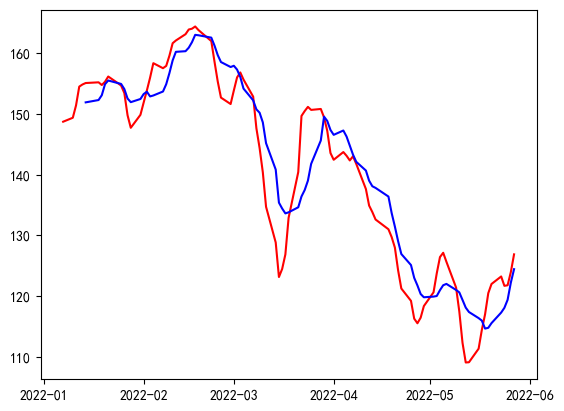

In [139]:
plt.plot(baidu_df.index, day5_mean, color='red') # 5日均线
plt.plot(baidu_df.index, day10_mean, color='blue') # 10日均线
plt.show()

In [140]:
boston_df = pd.read_csv(r'data\boston_house_price.csv')
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [141]:
boston_df.cov() # 协方差

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,73.986578,-40.215956,23.992339,-0.122109,0.419594,-1.325038,85.405322,-6.876722,46.847761,844.821538,5.399331,-302.381816,27.986168,-30.718508
ZN,-40.215956,543.936814,-85.412648,-0.252925,-1.396148,5.112513,-373.901548,32.629304,-63.348695,-1236.453735,-19.776571,373.721402,-68.783037,77.315176
INDUS,23.992339,-85.412648,47.064442,0.109669,0.607074,-1.887957,124.513903,-10.228097,35.549971,833.360290,5.692104,-223.579756,29.580270,-30.520823
CHAS,-0.122109,-0.252925,0.109669,0.064513,0.002684,0.016285,0.618571,-0.053043,-0.016296,-1.523367,-0.066819,1.131325,-0.097816,0.409409
NOX,0.419594,-1.396148,0.607074,0.002684,0.013428,-0.024603,2.385927,-0.187696,0.616929,13.046286,0.047397,-4.020570,0.488946,-0.455412
RM,-1.325038,5.112513,-1.887957,0.016285,-0.024603,0.493671,-4.751929,0.303663,-1.283815,-34.583448,-0.540763,8.215006,-3.079741,4.493446
AGE,85.405322,-373.901548,124.513903,0.618571,2.385927,-4.751929,792.358399,-44.329379,111.770846,2402.690122,15.936921,-702.940328,121.077725,-97.589017
DIS,-6.876722,32.629304,-10.228097,-0.053043,-0.187696,0.303663,-44.329379,4.434015,-9.068252,-189.664592,-1.059775,56.040356,-7.473329,4.840229
RAD,46.847761,-63.348695,35.549971,-0.016296,0.616929,-1.283815,111.770846,-9.068252,75.816366,1335.756577,8.760716,-353.276219,30.385442,-30.561228
TAX,844.821538,-1236.453735,833.360290,-1.523367,13.046286,-34.583448,2402.690122,-189.664592,1335.756577,28404.759488,168.153141,-6797.911215,654.714520,-726.255716


In [142]:
temp_df = boston_df.corr() # 相关系数
temp_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


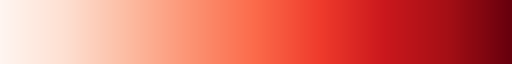

In [143]:
plt.get_cmap('Reds') # 获取颜色映射

In [144]:
# %pip install Jinja2 # 安装Jinja2, 用于生成html文件

In [145]:
temp_df.style.background_gradient('Reds') # 相关系数热力图

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [146]:
temp_df[['PRICE']].style.background_gradient('Reds') # PRICE列相关系数热力图

,PRICE
CRIM,-0.388305
ZN,0.360445
INDUS,-0.483725
CHAS,0.175260
NOX,-0.427321
RM,0.695360
AGE,-0.376955
DIS,0.249929
RAD,-0.381626
TAX,-0.468536


**Index类型**

In [147]:
from itertools import combinations, permutations, product # 导入组合, 排列, 笛卡尔积

for value in permutations('ABCDE', 3): # 排列
    print(value)

('A', 'B', 'C')
('A', 'B', 'D')
('A', 'B', 'E')
('A', 'C', 'B')
('A', 'C', 'D')
('A', 'C', 'E')
('A', 'D', 'B')
('A', 'D', 'C')
('A', 'D', 'E')
('A', 'E', 'B')
('A', 'E', 'C')
('A', 'E', 'D')
('B', 'A', 'C')
('B', 'A', 'D')
('B', 'A', 'E')
('B', 'C', 'A')
('B', 'C', 'D')
('B', 'C', 'E')
('B', 'D', 'A')
('B', 'D', 'C')
('B', 'D', 'E')
('B', 'E', 'A')
('B', 'E', 'C')
('B', 'E', 'D')
('C', 'A', 'B')
('C', 'A', 'D')
('C', 'A', 'E')
('C', 'B', 'A')
('C', 'B', 'D')
('C', 'B', 'E')
('C', 'D', 'A')
('C', 'D', 'B')
('C', 'D', 'E')
('C', 'E', 'A')
('C', 'E', 'B')
('C', 'E', 'D')
('D', 'A', 'B')
('D', 'A', 'C')
('D', 'A', 'E')
('D', 'B', 'A')
('D', 'B', 'C')
('D', 'B', 'E')
('D', 'C', 'A')
('D', 'C', 'B')
('D', 'C', 'E')
('D', 'E', 'A')
('D', 'E', 'B')
('D', 'E', 'C')
('E', 'A', 'B')
('E', 'A', 'C')
('E', 'A', 'D')
('E', 'B', 'A')
('E', 'B', 'C')
('E', 'B', 'D')
('E', 'C', 'A')
('E', 'C', 'B')
('E', 'C', 'D')
('E', 'D', 'A')
('E', 'D', 'B')
('E', 'D', 'C')


In [148]:
for value in combinations('ABCDE', 3): # 组合
    print(value)

('A', 'B', 'C')
('A', 'B', 'D')
('A', 'B', 'E')
('A', 'C', 'D')
('A', 'C', 'E')
('A', 'D', 'E')
('B', 'C', 'D')
('B', 'C', 'E')
('B', 'D', 'E')
('C', 'D', 'E')


In [149]:
for value in product('ABCD', '123'): # 笛卡尔积
    print(value)

('A', '1')
('A', '2')
('A', '3')
('B', '1')
('B', '2')
('B', '3')
('C', '1')
('C', '2')
('C', '3')
('D', '1')
('D', '2')
('D', '3')


In [150]:
stu_ids = np.arange(1001, 1006) # 学号
sms = ['期中', '期末'] # 期中, 期末
index = pd.MultiIndex.from_product((stu_ids, sms), names=['学号', '学期'])
index

MultiIndex([(1001, '期中'),
            (1001, '期末'),
            (1002, '期中'),
            (1002, '期末'),
            (1003, '期中'),
            (1003, '期末'),
            (1004, '期中'),
            (1004, '期末'),
            (1005, '期中'),
            (1005, '期末')],
           names=['学号', '学期'])

In [151]:
courses = ['语文', '数学', '英语'] # 语文, 数学, 英语
scores = np.random.randint(60, 101, (10, 3)) # 随机生成10个学生的语文, 数学, 英语成绩, 成绩范围60-100
scores_df = pd.DataFrame(data=scores, index=index, columns=courses) # 创建DataFrame
scores_df

语文  数学  英语
学号   学期            
1001 期中  69  70  90
     期末  95  65  63
1002 期中  63  86  89
     期末  73  86  76
1003 期中  67  61  68
     期末  69  86  70
1004 期中  88  65  98
     期末  99  79  70
1005 期中  90  87  64
     期末  71  62  68

In [152]:
scores_df.groupby(level=1).mean() # 学期分组, 求平均值

,语文,数学,英语
学期,,,
期中,75.4,73.8,81.8
期末,81.4,75.6,69.4


In [153]:
gb = scores_df.groupby(level=0) # 学号分组
gb.get_group(1001) # 获取学号为1001的学生的成绩

语文  数学  英语
学号   学期            
1001 期中  69  70  90
     期末  95  65  63

In [154]:
def handl_score1(x):
    a, b = x
    return a * 0.25 + b * 0.75


def handl_score2(x):
    return x.mean()  # 求平均值


def handl_score3(x):
    a, b = x
    return a * 0.5 + b * 0.5


scores_df.groupby(level=0).agg([handl_score1, handl_score2, handl_score3])


语文                                     数学               \
     handl_score1 handl_score2 handl_score3 handl_score1 handl_score2   
学号                                                                      
1001        88.50         82.0         82.0        66.25         67.5   
1002        70.50         68.0         68.0        86.00         86.0   
1003        68.50         68.0         68.0        79.75         73.5   
1004        96.25         93.5         93.5        75.50         72.0   
1005        75.75         80.5         80.5        68.25         74.5   

                            英语                            
     handl_score3 handl_score1 handl_score2 handl_score3  
学号                                                        
1001         67.5        69.75         76.5         76.5  
1002         86.0        79.25         82.5         82.5  
1003         73.5        69.50         69.0         69.0  
1004         72.0        77.00         84.0         84.0  
1005         74.5        67.00         66.0         66.0

**Datatimeindex**

In [155]:
pd.date_range('2021-1-1', '2021-6-1', periods=21)   # 生成21个日期

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-08 13:12:00',
               '2021-01-16 02:24:00', '2021-01-23 15:36:00',
               '2021-01-31 04:48:00', '2021-02-07 18:00:00',
               '2021-02-15 07:12:00', '2021-02-22 20:24:00',
               '2021-03-02 09:36:00', '2021-03-09 22:48:00',
               '2021-03-17 12:00:00', '2021-03-25 01:12:00',
               '2021-04-01 14:24:00', '2021-04-09 03:36:00',
               '2021-04-16 16:48:00', '2021-04-24 06:00:00',
               '2021-05-01 19:12:00', '2021-05-09 08:24:00',
               '2021-05-16 21:36:00', '2021-05-24 10:48:00',
               '2021-06-01 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [156]:
pd.date_range('2021-1-1', '2021-6-1', freq='W')   # 生成每周的日期

DatetimeIndex(['2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24',
               '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21',
               '2021-02-28', '2021-03-07', '2021-03-14', '2021-03-21',
               '2021-03-28', '2021-04-04', '2021-04-11', '2021-04-18',
               '2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16',
               '2021-05-23', '2021-05-30'],
              dtype='datetime64[ns]', freq='W-SUN')

In [157]:
pd.date_range('2021-1-1', '2021-6-1', freq='W') - pd.DateOffset(days=2)  # 生成每周的日期, 并减去2天

DatetimeIndex(['2021-01-01', '2021-01-08', '2021-01-15', '2021-01-22',
               '2021-01-29', '2021-02-05', '2021-02-12', '2021-02-19',
               '2021-02-26', '2021-03-05', '2021-03-12', '2021-03-19',
               '2021-03-26', '2021-04-02', '2021-04-09', '2021-04-16',
               '2021-04-23', '2021-04-30', '2021-05-07', '2021-05-14',
               '2021-05-21', '2021-05-28'],
              dtype='datetime64[ns]', freq=None)

In [158]:
pd.date_range('2021-1-1', '2021-6-1', freq='W') + pd.DateOffset(days=2)  # 生成每周的日期, 并加上2天

DatetimeIndex(['2021-01-05', '2021-01-12', '2021-01-19', '2021-01-26',
               '2021-02-02', '2021-02-09', '2021-02-16', '2021-02-23',
               '2021-03-02', '2021-03-09', '2021-03-16', '2021-03-23',
               '2021-03-30', '2021-04-06', '2021-04-13', '2021-04-20',
               '2021-04-27', '2021-05-04', '2021-05-11', '2021-05-18',
               '2021-05-25', '2021-06-01'],
              dtype='datetime64[ns]', freq=None)

In [159]:
baidu_df.asfreq('M') # 月频率

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-31,148.649994,159.809998,148.449997,159.740005,159.740005,3822300.0
2022-02-28,150.089996,153.479996,148.289993,152.440002,152.440002,3381000.0
2022-03-31,138.320007,139.500000,132.179993,132.300003,132.300003,7965900.0
2022-04-30,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
baidu_df.asfreq('10D') # 10天频率

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,148.910004,149.960007,144.949997,149.100006,149.100006,2329000.0
2022-01-13,155.619995,157.639999,152.309998,152.509995,152.509995,3271600.0
2022-01-23,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-02,161.720001,161.869995,155.850006,158.270004,158.270004,1974200.0
2022-02-12,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-22,154.179993,155.789993,150.119995,151.669998,151.669998,3384200.0
2022-03-04,152.300003,154.770004,146.399994,147.259995,147.259995,3248800.0
2022-03-14,107.650002,116.620003,102.180000,108.970001,108.970001,13559900.0
2022-03-24,153.710007,155.740005,143.509995,150.610001,150.610001,5256500.0


In [161]:
baidu_df.asfreq('5D', method='ffill') # 5天频率, 前向填充 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,148.910004,149.960007,144.949997,149.100006,149.100006,2329000
2022-01-08,152.979996,157.000000,152.279999,153.330002,153.330002,2752000
2022-01-13,155.619995,157.639999,152.309998,152.509995,152.509995,3271600
2022-01-18,150.940002,157.429993,149.610001,152.940002,152.940002,3185400
2022-01-23,162.529999,164.960007,156.259995,156.839996,156.839996,5463900
2022-01-28,143.720001,146.669998,139.100006,146.529999,146.529999,3186100
2022-02-02,161.720001,161.869995,155.850006,158.270004,158.270004,1974200
2022-02-07,156.039993,160.279999,155.330002,155.600006,155.600006,1987600
2022-02-12,163.600006,166.339996,159.850006,160.639999,160.639999,2325600


In [162]:
baidu_df.Volume.resample('10D').sum() # 10天频率, 求和

Date
2022-01-03    23421800
2022-01-13    23374100
2022-01-23    25726800
2022-02-02    19601400
2022-02-12    12805500
2022-02-22    29839200
2022-03-04    26620900
2022-03-14    78716500
2022-03-24    34923100
2022-04-03    25353300
2022-04-13    20832300
2022-04-23    22151500
2022-05-03    23252000
2022-05-13    17944300
2022-05-23    18052600
Freq: 10D, Name: Volume, dtype: int64